In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

**Heart Data**

In [3]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
heart_data
# Class: 0 is healathy, 1-4 is disease
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue

# heart_data.info()
heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)

shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)


In [4]:
Class = ['class']
Features = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal']

X = shuffled_heart_data[Features].values
Y = shuffled_heart_data[Class].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train size .2 (20/80)

Logistic Regression model accuracy (in %): 79.83


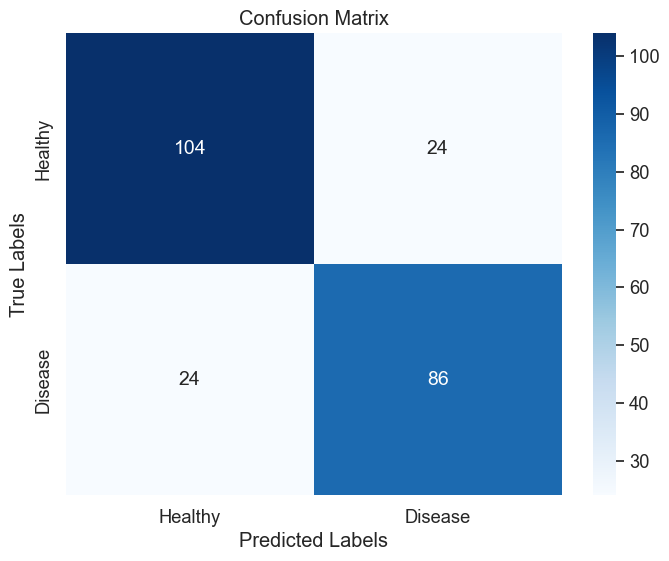

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       128
           1       0.78      0.78      0.78       110

    accuracy                           0.80       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.80      0.80       238

ROC AUC Score: 0.87


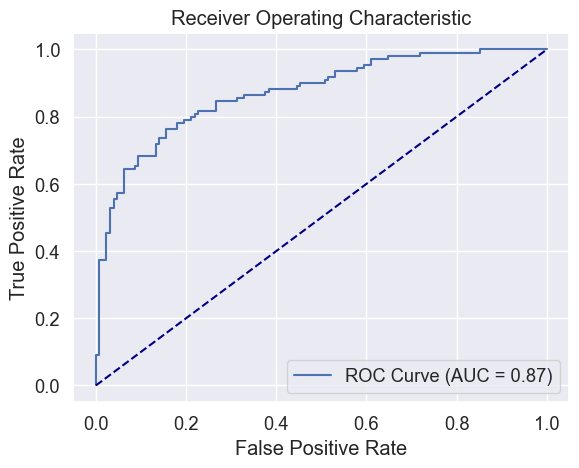

Cross-Validation Scores: [0.91666667 0.81666667 0.79661017 0.86440678 0.76271186]
Average CV Score: 0.83


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


ROC AUC Score: 0.90: This means that the model is quite good at distinguishing between classes. An AUC of 1 would be perfect, and 0.5 would be random. So, 0.90 is a strong result.

The average CV score is 0.84, meaning the model's average accuracy across different folds is 84%. This gives a sense of how well the model would perform on unseen data.



In [6]:
best_C = grid_search.best_params_['C']
print(f"Best C value from GridSearch: {best_C}")

Best C value from GridSearch: 0.01


In [7]:
# LogisticRegression
clf = LogisticRegression(random_state=0, C = 100)
clf.fit(X_train, y_train.ravel()) 
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 76.47058823529412


In [8]:
clf = LogisticRegression(random_state=0, C=0.1)
clf.fit(X_train, y_train.ravel()) 
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression model accuracy (in %): 77.73
Confusion Matrix:
[[100  28]
 [ 25  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       128
           1       0.75      0.77      0.76       110

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



train size .5 (50/50)

Logistic Regression model accuracy (in %): 81.88


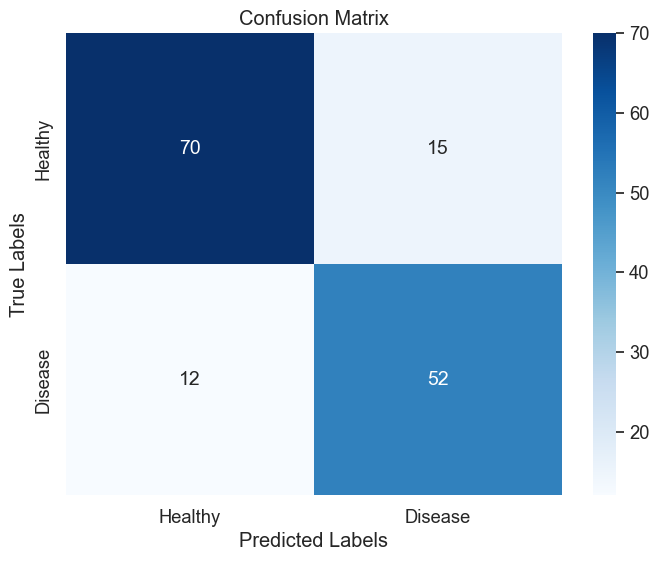

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        85
           1       0.78      0.81      0.79        64

    accuracy                           0.82       149
   macro avg       0.81      0.82      0.82       149
weighted avg       0.82      0.82      0.82       149

ROC AUC Score: 0.89


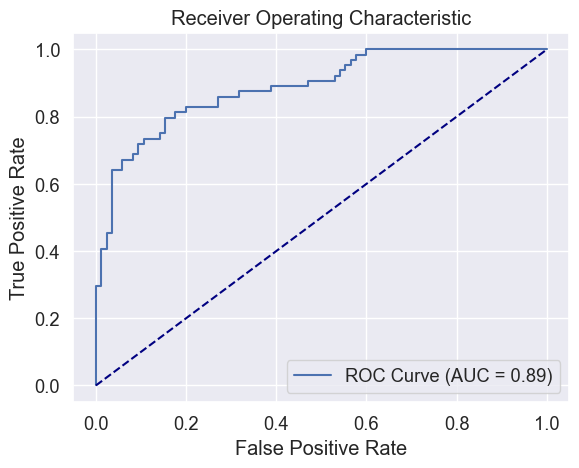

Cross-Validation Scores: [0.91666667 0.81666667 0.79661017 0.86440678 0.76271186]
Average CV Score: 0.83


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


train size .8 (80/20)

Logistic Regression model accuracy (in %): 80.00


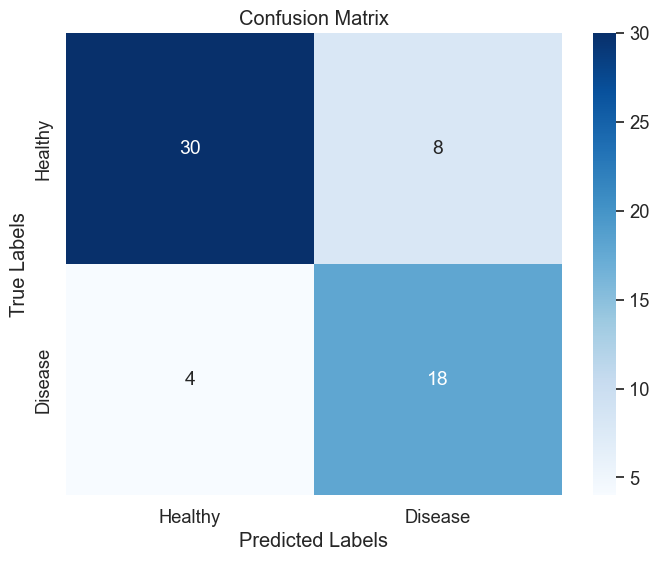

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.69      0.82      0.75        22

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.81      0.80      0.80        60

ROC AUC Score: 0.89


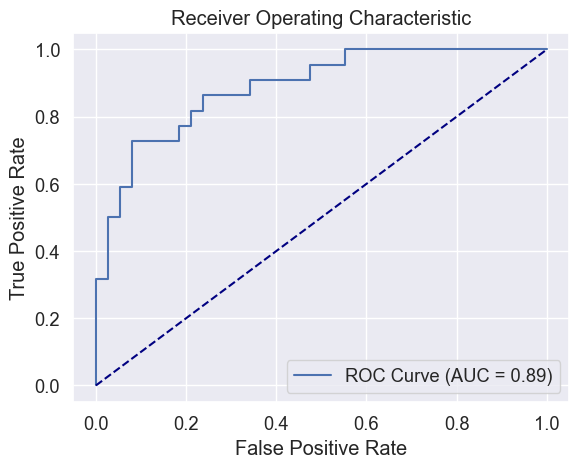

Cross-Validation Scores: [0.91666667 0.81666667 0.79661017 0.86440678 0.76271186]
Average CV Score: 0.83


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


**Parkinsons Data**

In [11]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)

correlation_matrix = parkin_data.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
parkin_data_reduced = parkin_data.drop(columns=to_drop)
shuffled_park_data = parkin_data_reduced.sample(frac=1)
shuffled_park_data.reset_index(inplace = True, drop = True)

TargetVal = ['status']
feat_list = list(parkin_data_reduced.columns)
feat_list.remove('status')
Features = feat_list
X = shuffled_park_data[Features].values
Y = shuffled_park_data[TargetVal].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train size .2 (20/80)

Logistic Regression model accuracy (in %): 83.33


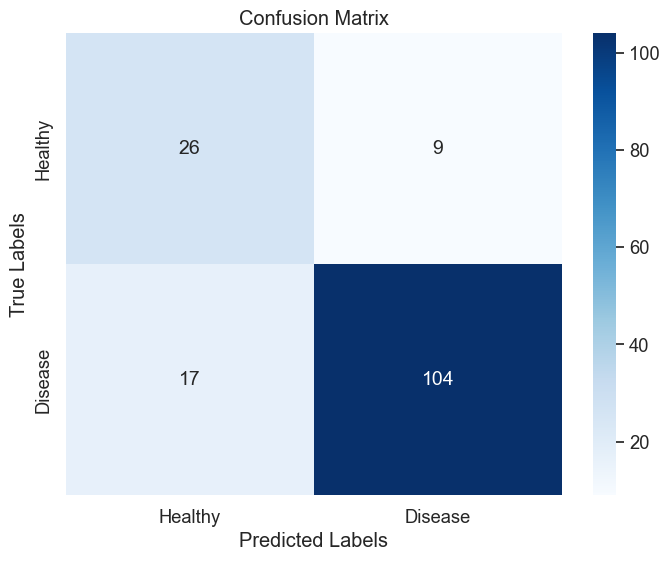

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.67        35
           1       0.92      0.86      0.89       121

    accuracy                           0.83       156
   macro avg       0.76      0.80      0.78       156
weighted avg       0.85      0.83      0.84       156

ROC AUC Score: 0.87


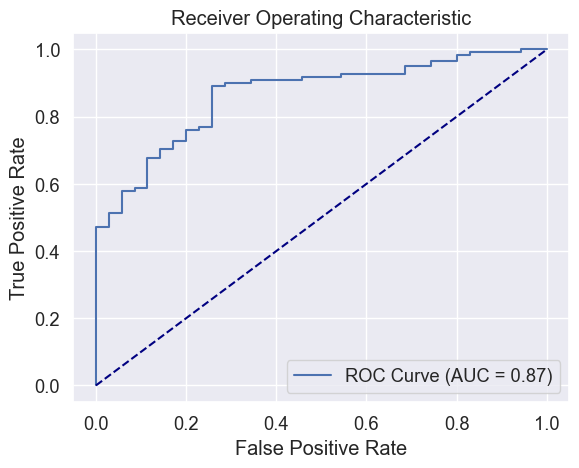

Cross-Validation Scores: [0.84615385 0.74358974 0.87179487 0.84615385 0.87179487]
Average CV Score: 0.84


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


Train size .5 (50/50)

Logistic Regression model accuracy (in %): 82.65


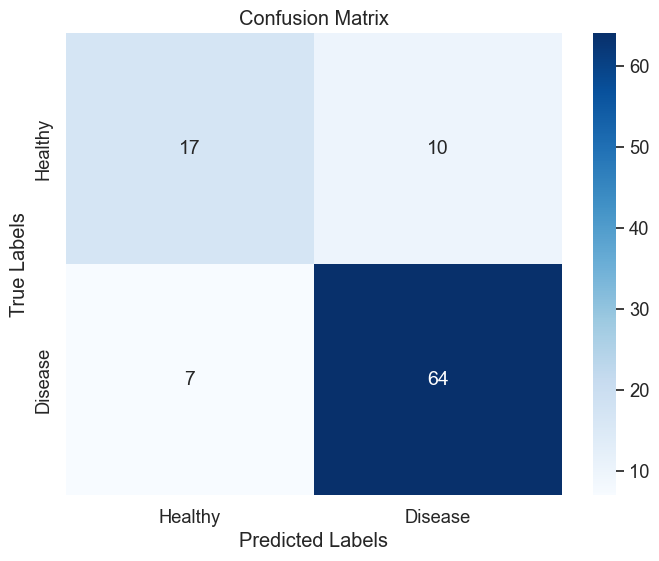

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.86      0.90      0.88        71

    accuracy                           0.83        98
   macro avg       0.79      0.77      0.77        98
weighted avg       0.82      0.83      0.82        98

ROC AUC Score: 0.90


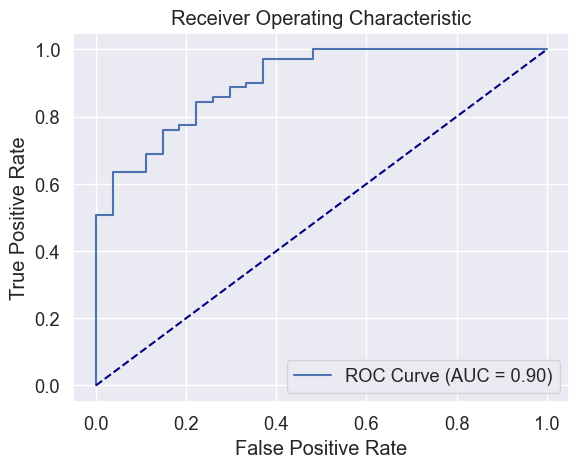

Cross-Validation Scores: [0.82051282 0.79487179 0.92307692 0.82051282 0.84615385]
Average CV Score: 0.84


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


Train size .8 (80/20)

Logistic Regression model accuracy (in %): 82.05


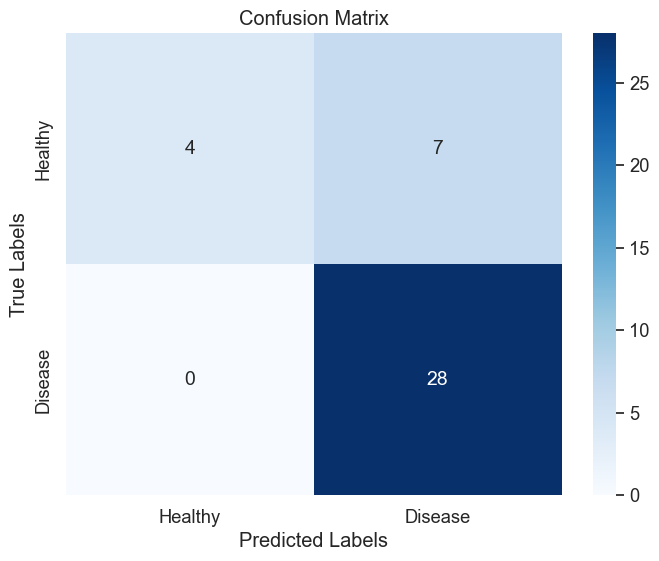

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.80      1.00      0.89        28

    accuracy                           0.82        39
   macro avg       0.90      0.68      0.71        39
weighted avg       0.86      0.82      0.79        39

ROC AUC Score: 0.83


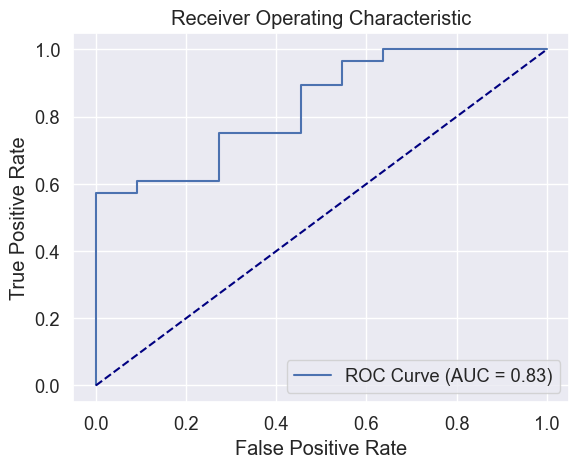

Cross-Validation Scores: [0.82051282 0.79487179 0.92307692 0.82051282 0.84615385]
Average CV Score: 0.84


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


**Breast Cancer Data**

In [21]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 
print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)

class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
# breast_data.info()

shuffled_breast_data = breast_data.sample(frac=1)
shuffled_breast_data.reset_index(inplace = True, drop = True)


Class = ['class']
feat_list = list(breast_data.columns)
feat_list.remove('class')
Features = feat_list

X = shuffled_breast_data[Features].values
Y = shuffled_breast_data[Class].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



10


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_86400/1694208879.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_86400/1694208879.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_86400/1694208879.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will

Train size .2 (20/80)

Logistic Regression model accuracy (in %): 70.27


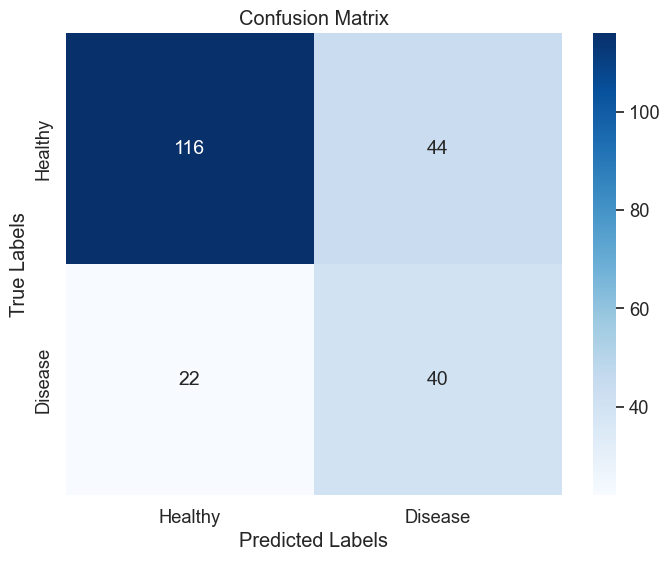

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       160
           1       0.48      0.65      0.55        62

    accuracy                           0.70       222
   macro avg       0.66      0.69      0.66       222
weighted avg       0.74      0.70      0.71       222

ROC AUC Score: 0.73


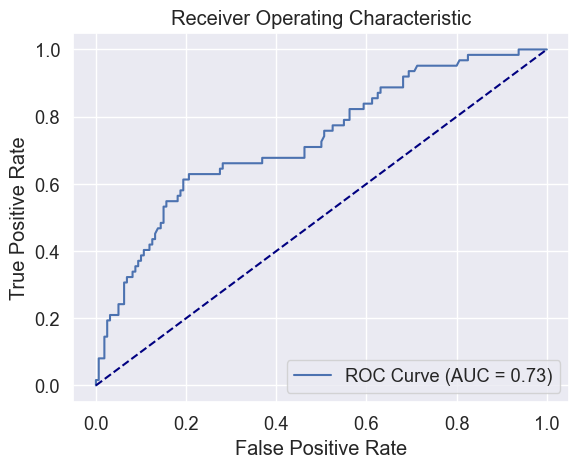

Cross-Validation Scores: [0.76785714 0.75       0.74545455 0.74545455 0.69090909]
Average CV Score: 0.74


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


Train size .5 (50/50)

Logistic Regression model accuracy (in %): 76.26


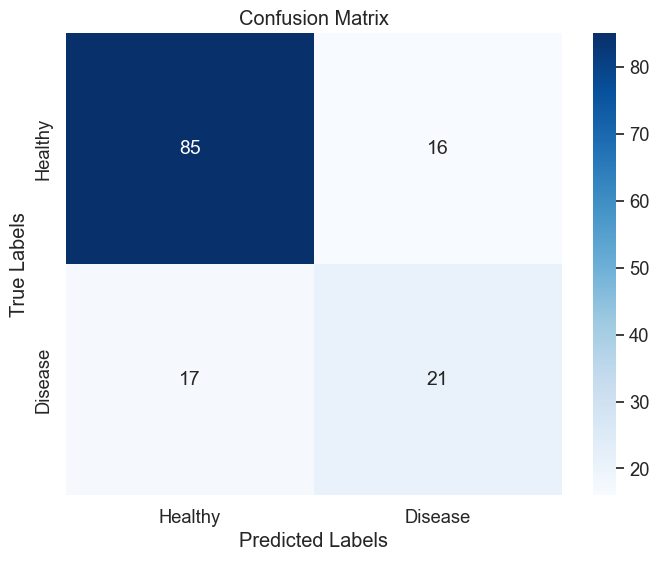

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       101
           1       0.57      0.55      0.56        38

    accuracy                           0.76       139
   macro avg       0.70      0.70      0.70       139
weighted avg       0.76      0.76      0.76       139

ROC AUC Score: 0.71


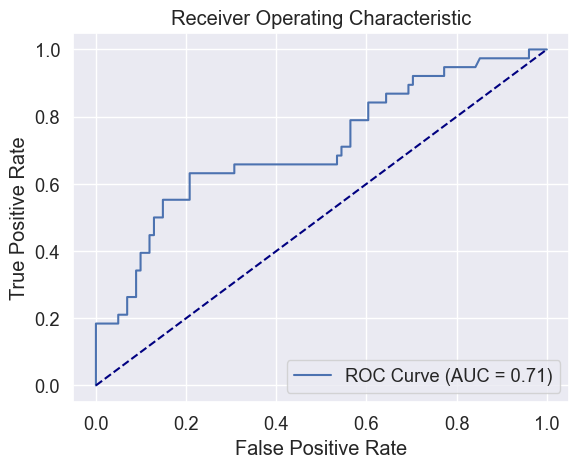

Cross-Validation Scores: [0.76785714 0.75       0.74545455 0.74545455 0.69090909]
Average CV Score: 0.74


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


Train size 0.8 (80/20)

Logistic Regression model accuracy (in %): 73.21


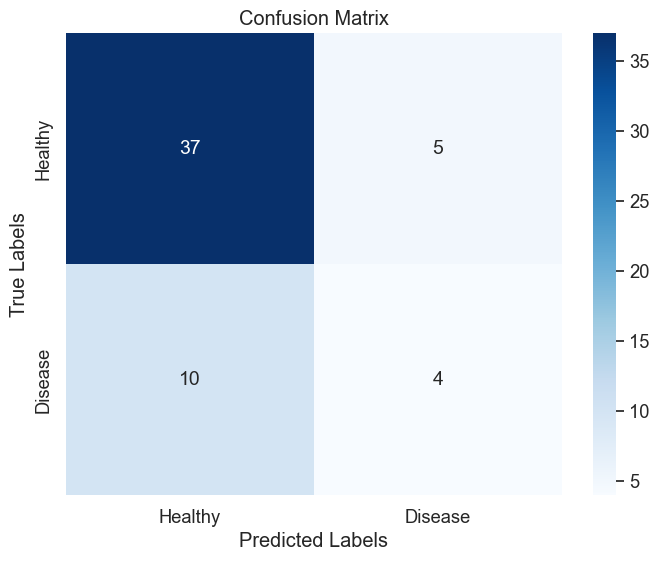

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        42
           1       0.44      0.29      0.35        14

    accuracy                           0.73        56
   macro avg       0.62      0.58      0.59        56
weighted avg       0.70      0.73      0.71        56

ROC AUC Score: 0.65


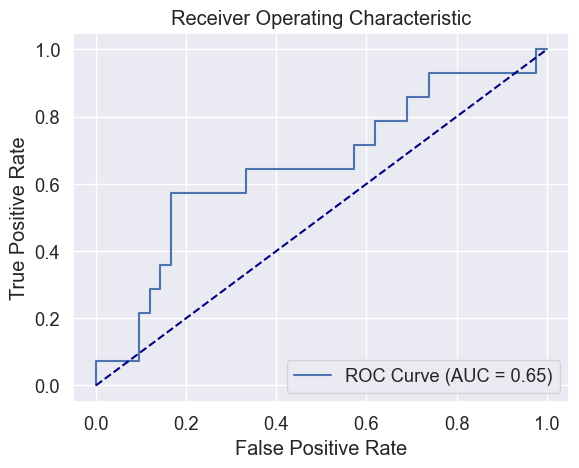

Cross-Validation Scores: [0.78571429 0.76785714 0.76363636 0.69090909 0.69090909]
Average CV Score: 0.74


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel()) 

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1] 

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {acc * 100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.2)  # Adjust font size for labels
sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.2f}")


In [25]:
# LogisticRegression
clf = LogisticRegression(random_state=0, C = 100)
clf.fit(X_train, y_train.ravel()) 
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 75.0
